#### 200242V

C:\Users\User\AppData\Local\Temp\ipykernel_12692\143023955.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


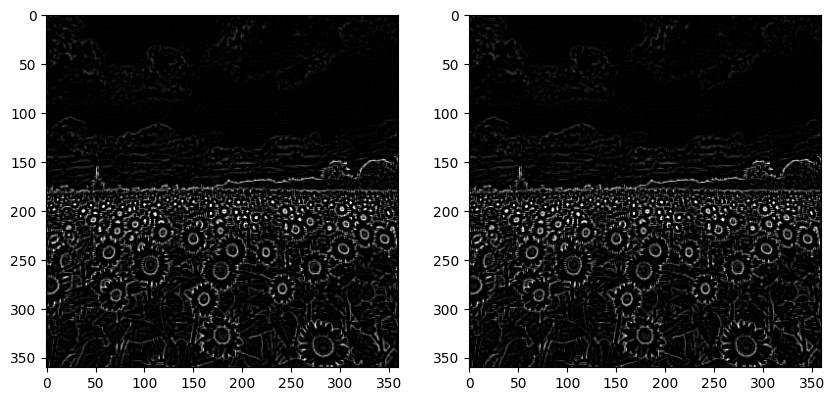

In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("the_berry_farms_sunflower_field.jpeg",cv.IMREAD_REDUCED_COLOR_4).astype(np.uint8)
#plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

gaussian_blur1 = cv.GaussianBlur(gray_image, (3, 3), 3)
gaussian_blur2 = cv.GaussianBlur(gray_image, (3, 3), 5)

#plt.imshow(gaussian_blur, cmap="gray")
laplacian1 = cv.Laplacian(gaussian_blur1, cv.CV_8U , ksize=3)
laplacian2 = cv.Laplacian(gaussian_blur2, cv.CV_8U , ksize=3)

plt.subplots(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(laplacian1, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(laplacian2, cmap="gray")


42.42640687119285


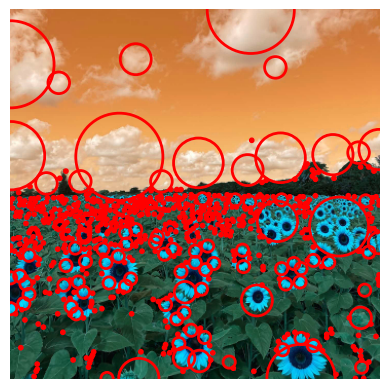

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
import skimage
from skimage.feature import blob_log

image = cv.imread("the_berry_farms_sunflower_field.jpeg", cv.IMREAD_REDUCED_COLOR_4)
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

blobs_log = blob_log(gray_image, min_sigma=1, max_sigma=30, num_sigma=10, threshold=.1)
a = max(blobs_log[:, 2])
blobs_log[:, 2] = blobs_log[:, 2] * math.sqrt(2)
b = max(blobs_log[:, 2])

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')

for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)

print(max(blobs_log[:, 2]))

plt.show()